In [7]:
import numpy as np
import glob
import os
from opac_mixer.read import ReadOpacChubb
from opac_mixer.emulator import Emulator

import matplotlib.pyplot as plt
import shap
import xgboost as xg

from sklearn.metrics import r2_score, mean_squared_error
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown
%matplotlib widget

In [2]:
R='S1'
base = f'{os.environ["pRT_input_data_path"]}/opacities/lines/corr_k'
files = glob.glob(os.path.join(base,f'*_R_{R}/*.h5'))
batchsize = int(2**16)

load = True
load_model = False

In [3]:
opac = ReadOpacChubb(files)
emulator = Emulator(opac)

In [4]:
emulator.setup_sampling_grid(batchsize=batchsize, filename=f'data/input_{batchsize}', load=load)
emulator.setup_mix(filename=f'data/mix_R_{R}_{batchsize}', load=load)
emulator.setup_model(load=load_model, filename=f'data/model_R_{R}_{batchsize}', tree_method='hist')
emulator.fit()

[0]	validation_0-rmse:0.23059	validation_1-rmse:0.23063
[1]	validation_0-rmse:0.19069	validation_1-rmse:0.19091
[2]	validation_0-rmse:0.15997	validation_1-rmse:0.16033
[3]	validation_0-rmse:0.13598	validation_1-rmse:0.13645
[4]	validation_0-rmse:0.11824	validation_1-rmse:0.11882
[5]	validation_0-rmse:0.10353	validation_1-rmse:0.10418
[6]	validation_0-rmse:0.09224	validation_1-rmse:0.09296
[7]	validation_0-rmse:0.08324	validation_1-rmse:0.08404
[8]	validation_0-rmse:0.07563	validation_1-rmse:0.07649
[9]	validation_0-rmse:0.06955	validation_1-rmse:0.07047
[10]	validation_0-rmse:0.06465	validation_1-rmse:0.06562
[11]	validation_0-rmse:0.06048	validation_1-rmse:0.06150
[12]	validation_0-rmse:0.05725	validation_1-rmse:0.05832
[13]	validation_0-rmse:0.05438	validation_1-rmse:0.05549
[14]	validation_0-rmse:0.05195	validation_1-rmse:0.05310
[15]	validation_0-rmse:0.04999	validation_1-rmse:0.05118
[16]	validation_0-rmse:0.04824	validation_1-rmse:0.04946
[17]	validation_0-rmse:0.04671	validation

In [6]:
explainer = shap.TreeExplainer(emulator.model)
shap_values = explainer.shap_values(emulator.X_test, y=emulator.y_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [52]:
X_labels = [*opac.spec, "p", "T"]
freq, g = np.meshgrid(opac.bin_center, opac.weights.cumsum(), indexing='ij')
y_labels = [f"{fi:.0f}-{gi:.1f}" for fi,gi in zip(freq.flatten(), g.flatten())]

Creating legend with loc="best" can be slow with large amounts of data.
Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
Creating legend with loc="best" can be slow with large amounts of data.


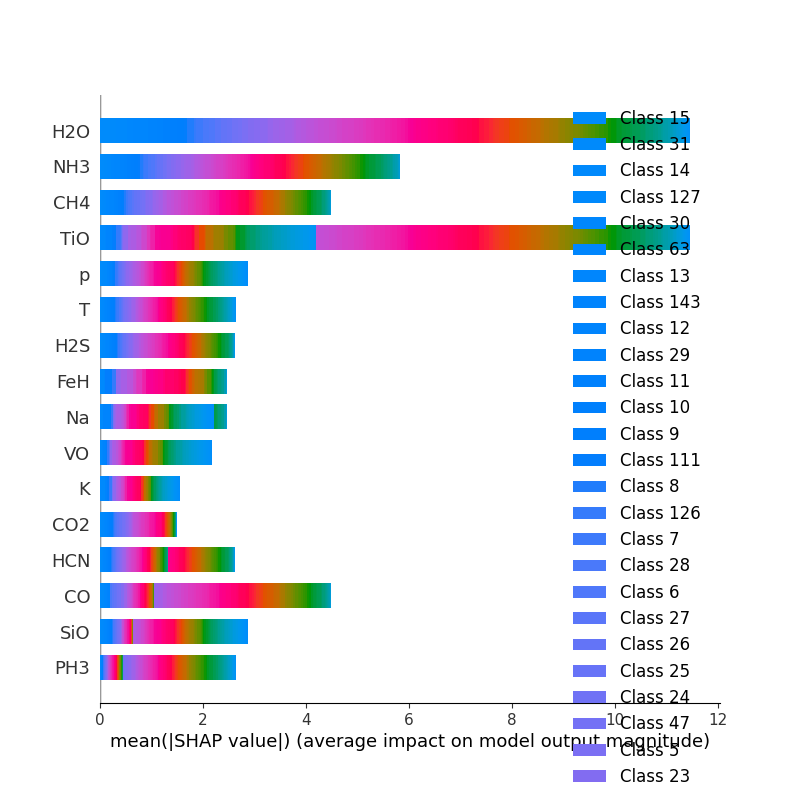

In [56]:
shap.initjs()
shap.summary_plot(shap_values, feature_names=X_labels, class_names=y_labels, sort=True)